<a href="https://colab.research.google.com/github/sanjuth/dlvs/blob/main/weed_detection_(soya_bean).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import skimage.io as skio
imstack1=skio.imread("/kaggle/input/weed-detection-in-soybean-crops/dataset/soil/1259.tif")
imstack1.shape

(264, 209, 3)

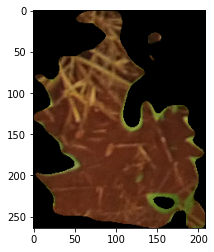

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(imstack1)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import os
from matplotlib import image
from PIL import Image
def load_imgs(path):
    folders=os.listdir(path)
    data = []
    label = []
    folders.remove('dataset')
    for i in folders:
        images=os.listdir(path+'/'+i)
        for j in images:
            im=Image.open(path+'/'+i+'/'+j).convert('RGB')
            im=im.resize((32,32))
            ar=np.array(im)
            data.append(ar)
            label.append(i)
    t=pd.factorize(np.array(label))
    return np.array(data),label

In [ ]:


x,y=load_imgs("/kaggle/input/weed-detection-in-soybean-crops/dataset")
x.shape



(15336, 32, 32, 3)

In [ ]:
target=pd.Series(y,dtype='category')
t=target.cat.codes

In [ ]:


dicti=dict(enumerate(target.cat.categories))
print(dicti)



{0: 'broadleaf', 1: 'grass', 2: 'soil', 3: 'soybean'}


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,t,test_size=0.2,random_state=100)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((12268, 32, 32, 3), (3068, 32, 32, 3), (12268,), (3068,))

In [ ]:
from tensorflow.keras.layers import MaxPool2D, Flatten, Conv2D, Dense
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(x_train.shape[1:])))
#model.add(MaxPool2D(2,2))
model.add(Conv2D(64,kernel_size=3,activation='relu'))
#model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(6,activation='softmax'))
model.summary()

2022-12-12 05:52:51.277740: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-12 05:52:51.398451: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-12 05:52:51.399267: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-12 05:52:51.400208: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0         
_________________________________________________________________
dense (Dense)                (None, 6)                 301062    
Total params: 320,454
Trainable params: 320,454
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=11)

2022-12-12 05:52:54.231005: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/11


2022-12-12 05:52:55.458282: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


384/384 [==============================] - 8s 3ms/step - loss: 3.7475 - accuracy: 0.7260
Epoch 2/11
384/384 [==============================] - 1s 3ms/step - loss: 0.4411 - accuracy: 0.8370
Epoch 3/11
384/384 [==============================] - 2s 4ms/step - loss: 0.3461 - accuracy: 0.8724
Epoch 4/11
384/384 [==============================] - 1s 3ms/step - loss: 0.2540 - accuracy: 0.9057
Epoch 5/11
384/384 [==============================] - 1s 3ms/step - loss: 0.1801 - accuracy: 0.9352
Epoch 6/11
384/384 [==============================] - 1s 3ms/step - loss: 0.1480 - accuracy: 0.9484
Epoch 7/11
384/384 [==============================] - 1s 4ms/step - loss: 0.1387 - accuracy: 0.9512
Epoch 8/11
384/384 [==============================] - 1s 3ms/step - loss: 0.1399 - accuracy: 0.9544
Epoch 9/11
384/384 [==============================] - 1s 3ms/step - loss: 0.1222 - accuracy: 0.9580
Epoch 10/11
384/384 [==============================] - 1s 3ms/step - loss: 0.1024 - accuracy: 0.9654
Epoch 11/1

In [ ]:
y_pred=np.argmax(model.predict(x_test), axis=-1)
y_pred

array([2, 3, 3, ..., 2, 1, 3])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8122555410691004

In [ ]:
model.evaluate(x_train,y_train)

384/384 [==============================] - 1s 2ms/step - loss: 0.0855 - accuracy: 0.9716


[0.0854649767279625, 0.9715520143508911]

In [ ]:
model.evaluate(x_test,y_test)

96/96 [==============================] - 0s 2ms/step - loss: 1.1418 - accuracy: 0.8123


[1.1417796611785889, 0.8122555613517761]

In [ ]:
from tensorflow.keras.layers import MaxPool2D, Flatten, Conv2D, Dense
from tensorflow.keras.models import Sequential
model_1 = Sequential()
model_1.add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(x_train.shape[1:])))
model_1.add(MaxPool2D(2,2))
model_1.add(Conv2D(64,kernel_size=3,activation='relu'))
model_1.add(MaxPool2D(2,2))

model_1.add(Flatten())
model_1.add(Dense(6,activation='softmax'))
model_1.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 13830     
Total params: 33,222
Trainable params: 33,222
Non-trainable params: 0
__________________________________________________

In [ ]:
model_1.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model_1.fit(x_train,y_train,epochs=11)

Epoch 1/11
384/384 [==============================] - 2s 3ms/step - loss: 1.6759 - accuracy: 0.7166
Epoch 2/11
384/384 [==============================] - 1s 3ms/step - loss: 0.4627 - accuracy: 0.8226
Epoch 3/11
384/384 [==============================] - 1s 3ms/step - loss: 0.3679 - accuracy: 0.8609
Epoch 4/11
384/384 [==============================] - 1s 3ms/step - loss: 0.2986 - accuracy: 0.8882
Epoch 5/11
384/384 [==============================] - 1s 3ms/step - loss: 0.2680 - accuracy: 0.9006
Epoch 6/11
384/384 [==============================] - 1s 3ms/step - loss: 0.2392 - accuracy: 0.9129
Epoch 7/11
384/384 [==============================] - 1s 3ms/step - loss: 0.2191 - accuracy: 0.9200
Epoch 8/11
384/384 [==============================] - 1s 3ms/step - loss: 0.2034 - accuracy: 0.9271
Epoch 9/11
384/384 [==============================] - 1s 3ms/step - loss: 0.1803 - accuracy: 0.9357
Epoch 10/11
384/384 [==============================] - 1s 3ms/step - loss: 0.1832 - accuracy: 0.9365

In [ ]:


y_pred=np.argmax(model_1.predict(x_test), axis=-1)
y_pred



array([2, 3, 3, ..., 2, 0, 3])

In [ ]:
accuracy_score(y_test,y_pred)

0.9048239895697523

In [ ]:
model_1.evaluate(x_train,y_train)

384/384 [==============================] - 1s 2ms/step - loss: 0.1457 - accuracy: 0.9505


[0.14574487507343292, 0.95052170753479]

In [ ]:
model_1.evaluate(x_test,y_test)

96/96 [==============================] - 0s 2ms/step - loss: 0.2809 - accuracy: 0.9048


[0.28089889883995056, 0.9048240184783936]

In [ ]:


from tensorflow.keras.layers import Dropout
model_2 = Sequential()
model_2.add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(x_train.shape[1:])))#,kernel_regulizer="l2"
model_2.add(Conv2D(32,kernel_size=3,activation='relu'))
model_2.add(MaxPool2D(2,2))
#model_2.add(Dropout(0.2))
model_2.add(Conv2D(64,kernel_size=5,activation='relu'))
model_2.add(MaxPool2D(2,2))
model_2.add(Dropout(0.3))
model_2.add(Flatten())
model_2.add(Dense(100,activation='relu'))
model_2.add(Dense(6,activation='softmax'))
model_2.summary()



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)             

In [ ]:
model_2.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model_2.fit(x_train,y_train,epochs=11)

Epoch 1/11
384/384 [==============================] - 2s 3ms/step - loss: 1.0784 - accuracy: 0.7726
Epoch 2/11
384/384 [==============================] - 1s 3ms/step - loss: 0.3647 - accuracy: 0.8622
Epoch 3/11
384/384 [==============================] - 1s 3ms/step - loss: 0.3125 - accuracy: 0.8851
Epoch 4/11
384/384 [==============================] - 1s 3ms/step - loss: 0.2373 - accuracy: 0.9134
Epoch 5/11
384/384 [==============================] - 1s 3ms/step - loss: 0.2166 - accuracy: 0.9215
Epoch 6/11
384/384 [==============================] - 1s 3ms/step - loss: 0.1903 - accuracy: 0.9325
Epoch 7/11
384/384 [==============================] - 1s 3ms/step - loss: 0.1745 - accuracy: 0.9381
Epoch 8/11
384/384 [==============================] - 1s 3ms/step - loss: 0.1403 - accuracy: 0.9491
Epoch 9/11
384/384 [==============================] - 1s 3ms/step - loss: 0.1297 - accuracy: 0.9557
Epoch 10/11
384/384 [==============================] - 1s 3ms/step - loss: 0.1357 - accuracy: 0.9518

In [ ]:
y2_pred=np.argmax(model_2.predict(x_test), axis=-1)
y2_pred

array([2, 3, 3, ..., 2, 1, 3])

In [ ]:
accuracy_score(y_test,y2_pred)

0.9465449804432855

In [ ]:
model_2.evaluate(x_train,y_train)

384/384 [==============================] - 1s 3ms/step - loss: 0.0458 - accuracy: 0.9858


[0.04577096924185753, 0.9858167767524719]

In [ ]:
model_2.evaluate(x_test,y_test)

96/96 [==============================] - 0s 2ms/step - loss: 0.1699 - accuracy: 0.9465


[0.16988463699817657, 0.9465450048446655]

In [ ]:


from tensorflow.keras.layers import MaxPool2D, Flatten, Conv2D, Dense
from tensorflow.keras.models import Sequential
from keras import regularizers
model_3 = Sequential()
model_3.add(Conv2D(32,kernel_size=3,activation='relu',kernel_regularizer="l2",input_shape=(x_train.shape[1:])))#,kernel_regulizer="l2" 
model_3.add(Conv2D(32,kernel_size=3,activation='relu',kernel_regularizer="l2"))
model_3.add(MaxPool2D(2,2))
model_3.add(Conv2D(64,kernel_size=5,activation='relu',kernel_regularizer="l2"))
model_3.add(MaxPool2D(2,2))
model_3.add(Dropout(0.3))
model_3.add(Flatten())
model_3.add(Dense(100,activation='relu'))
model_3.add(Dense(6,activation='softmax'))
model_3.summary()



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)             

In [ ]:
model_3.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model_3.fit(x_train,y_train,epochs=11)

Epoch 1/11
384/384 [==============================] - 2s 3ms/step - loss: 1.9014 - accuracy: 0.8083
Epoch 2/11
384/384 [==============================] - 1s 3ms/step - loss: 0.8347 - accuracy: 0.8741
Epoch 3/11
384/384 [==============================] - 1s 3ms/step - loss: 0.7032 - accuracy: 0.8926
Epoch 4/11
384/384 [==============================] - 1s 3ms/step - loss: 0.6038 - accuracy: 0.9043
Epoch 5/11
384/384 [==============================] - 1s 3ms/step - loss: 0.5969 - accuracy: 0.8976
Epoch 6/11
384/384 [==============================] - 1s 3ms/step - loss: 0.4842 - accuracy: 0.9239
Epoch 7/11
384/384 [==============================] - 1s 4ms/step - loss: 0.4400 - accuracy: 0.9305
Epoch 8/11
384/384 [==============================] - 2s 4ms/step - loss: 0.3892 - accuracy: 0.9397
Epoch 9/11
384/384 [==============================] - 1s 3ms/step - loss: 0.3649 - accuracy: 0.9386
Epoch 10/11
384/384 [==============================] - 1s 3ms/step - loss: 0.3502 - accuracy: 0.9398

In [ ]:
y3_pred=np.argmax(model_3.predict(x_test), axis=-1)
y3_pred

array([2, 3, 3, ..., 2, 1, 3])

In [ ]:
accuracy_score(y_test,y3_pred)

0.9227509778357236

In [ ]:
model_3.evaluate(x_train,y_train)

384/384 [==============================] - 1s 2ms/step - loss: 0.3216 - accuracy: 0.9384


[0.32158929109573364, 0.938376247882843]

In [ ]:
model_3.evaluate(x_test,y_test)

96/96 [==============================] - 0s 2ms/step - loss: 0.3624 - accuracy: 0.9228


[0.3624057471752167, 0.9227509498596191]